<a href="https://colab.research.google.com/github/raghulajithn/imageClassification/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bi

In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/drive/MyDrive/Data'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list /content/drive/MyDrive/Data/accident/vector9.svg
Image not in ext list /content/drive/MyDrive/Data/accident/vector2.svg
Image not in ext list /content/drive/MyDrive/Data/accident/vector.svg
Image not in ext list /content/drive/MyDrive/Data/accident/vector10.svg
Image not in ext list /content/drive/MyDrive/Data/accident/vector8.svg
Image not in ext list /content/drive/MyDrive/Data/accident/vector4.svg
Image not in ext list /content/drive/MyDrive/Data/accident/vector3.svg
Image not in ext list /content/drive/MyDrive/Data/accident/vector5.svg
Image not in ext list /content/drive/MyDrive/Data/accident/vector7.svg
Image not in ext list /content/drive/MyDrive/Data/accident/vector11.svg
Image not in ext list /content/drive/MyDrive/Data/accident/vector6.svg
Image not in ext list /content/drive/MyDrive/Data/accident/981065-car-accident.webp
Image not in ext list /content/drive/MyDrive/Data/accident/10216_8_12_2023_20_44_18_1_08_12_2023_ACCIDENT.JPEG.jpg
Image not in ext li

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Data')

Found 265 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

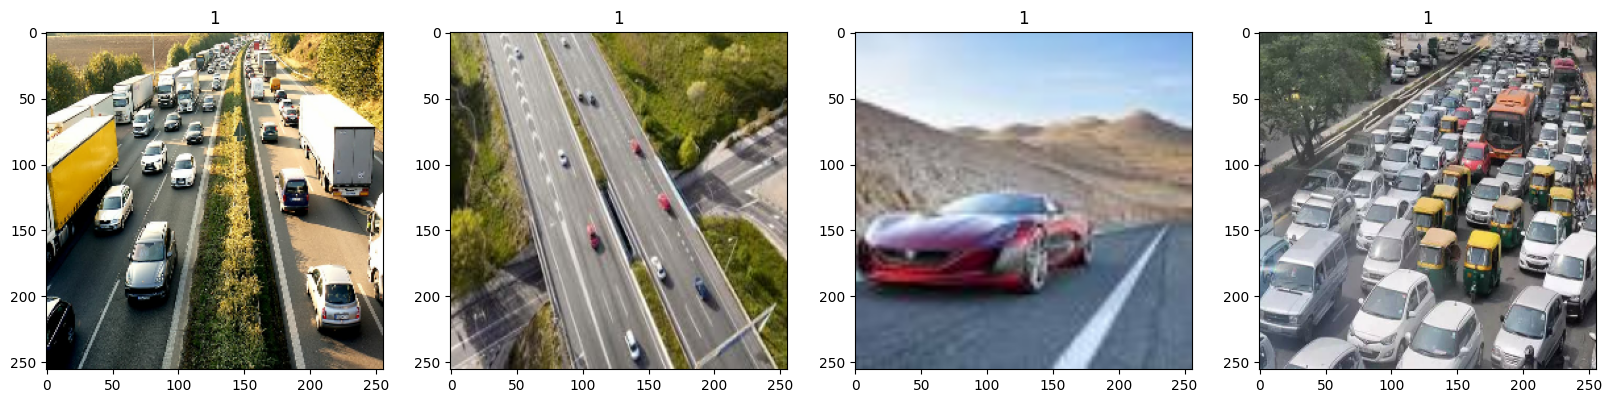

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.7019608 , 0.75686276, 0.9019608 ],
          [0.7019608 , 0.75686276, 0.9019608 ],
          [0.7019608 , 0.75686276, 0.9019608 ],
          ...,
          [0.54509807, 0.6784314 , 0.85490197],
          [0.54509807, 0.6784314 , 0.85490197],
          [0.54509807, 0.6784314 , 0.85490197]],
 
         [[0.7012868 , 0.75652575, 0.9029718 ],
          [0.70122886, 0.7565547 , 0.90291387],
          [0.7009655 , 0.75668633, 0.9026506 ],
          ...,
          [0.5461091 , 0.6794424 , 0.85625   ],
          [0.5461091 , 0.6794424 , 0.85625   ],
          [0.5461091 , 0.6794424 , 0.85625   ]],
 
         [[0.69822305, 0.75499386, 0.9075674 ],
          [0.69790184, 0.7551545 , 0.9072462 ],
          [0.69644177, 0.7558845 , 0.90578616],
          ...,
          [0.55070466, 0.684038  , 0.86237746],
          [0.55070466, 0.684038  , 0.86237746],
          [0.55070466, 0.684038  , 0.86237746]],
 
         ...,
 
         [[0.735386  , 0.70401347, 0.6608762 ],
          [0.73607

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

6

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 19s 3s/step - loss: 0.6608 - accuracy: 0.7135 - val_loss: 0.6071 - val_accuracy: 0.7188
Epoch 2/20
6/6 [==============================] - 15s 2s/step - loss: 0.6032 - accuracy: 0.7083 - val_loss: 0.6381 - val_accuracy: 0.6250
Epoch 3/20
6/6 [==============================] - 15s 2s/step - loss: 0.5514 - accuracy: 0.7344 - val_loss: 0.5417 - val_accuracy: 0.6875
Epoch 4/20
6/6 [==============================] - 14s 2s/step - loss: 0.4926 - accuracy: 0.7552 - val_loss: 0.3565 - val_accuracy: 0.8125
Epoch 5/20
6/6 [==============================] - 16s 2s/step - loss: 0.4377 - accuracy: 0.7969 - val_loss: 0.2730 - val_accuracy: 0.8750
Epoch 6/20
6/6 [==============================] - 15s 2s/step - loss: 0.4299 - accuracy: 0.7865 - val_loss: 0.3594 - val_accuracy: 0.8750
Epoch 7/20
6/6 [==============================] - 15s 2s/step - loss: 0.3326 - accuracy: 0.8594 - val_loss: 0.3274 - val_accuracy: 0.8750
Epoch 8/20
6/6 [==================

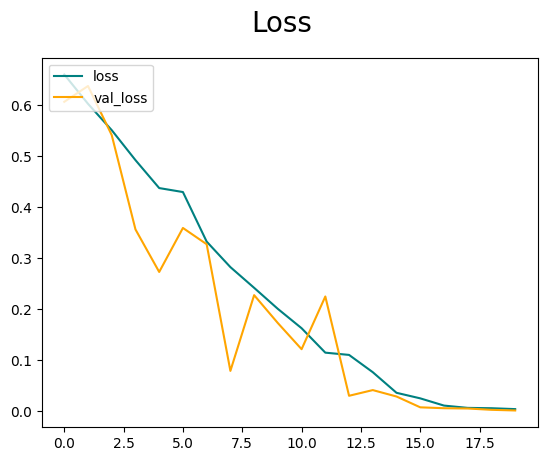

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

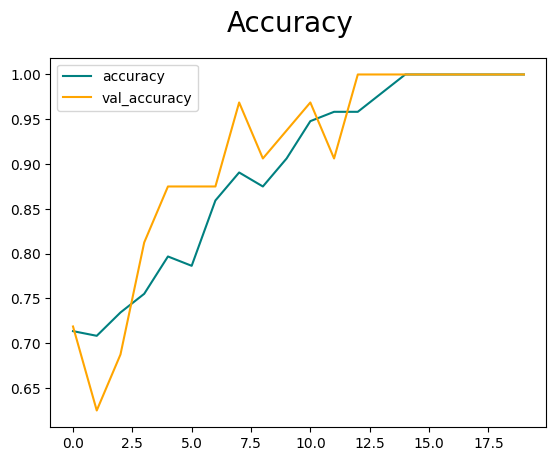

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [ ]:
import cv2

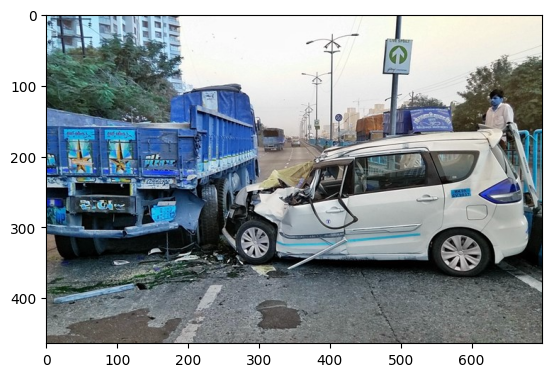

In [ ]:
img = cv2.imread('/content/drive/MyDrive/car_accident.jpg')
plt.imshow(img)
plt.show()

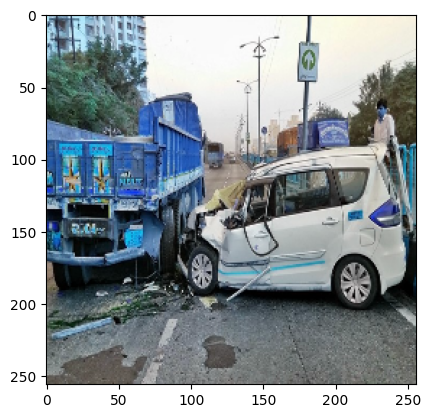

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 144ms/step


In [ ]:
yhat

array([[2.710963e-05]], dtype=float32)

In [ ]:
if yhat < 0.5:
    print(f'Predicted class is accident')
else:
    print(f'Predicted class is safe')

Predicted class is accident
